# Libraries & Data Loading

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from cdt.data import AcyclicGraphGenerator

import cdt
import networkx as nx

In [40]:
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [77]:
dataset_dir = "datasets"

breast_cancer_df = pd.read_csv(f"{dataset_dir}/breast_cancer.csv")
thyroid_df = pd.read_csv(f"{dataset_dir}/thyroid.csv")
cardio_df = pd.read_csv(f"{dataset_dir}/cardio.csv", delimiter=";", index_col='id')

## Breast cancer dataset preprocessing

In [78]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [79]:
# Convert column "diagnosis" from categorical to binary
breast_cancer_df.loc[breast_cancer_df['diagnosis'] == "M", 'diagnosis'] = 1
breast_cancer_df.loc[breast_cancer_df['diagnosis'] == "B", 'diagnosis'] = 0

# Drop colum "Unnamed: 32" (contains only nan values)
breast_cancer_df.drop(columns=["Unnamed: 32", 'id'], inplace=True)
#target_bc = breast_cancer_df.pop('diagnosis').to_numpy().astype(int)

<AxesSubplot:xlabel='diagnosis', ylabel='Count'>

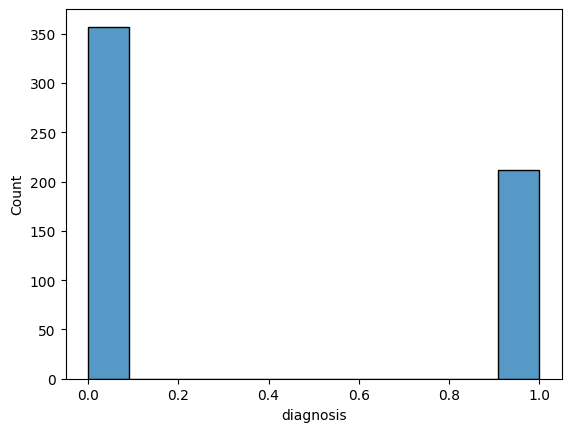

In [80]:
sns.histplot(breast_cancer_df['diagnosis'])

In [81]:
scaler = StandardScaler()
breast_cancer_df = pd.DataFrame(scaler.fit_transform(breast_cancer_df.to_numpy()), columns=breast_cancer_df.columns)

In [82]:
breast_cancer_df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     1.297676     1.097064     -2.073335        1.269934   0.984375   
1     1.297676     1.829821     -0.353632        1.685955   1.908708   
2     1.297676     1.579888      0.456187        1.566503   1.558884   
3     1.297676    -0.768909      0.253732       -0.592687  -0.764464   
4     1.297676     1.750297     -1.151816        1.776573   1.826229   
..         ...          ...           ...             ...        ...   
564   1.297676     2.110995      0.721473        2.060786   2.343856   
565   1.297676     1.704854      2.085134        1.615931   1.723842   
566   1.297676     0.702284      2.045574        0.672676   0.577953   
567   1.297676     1.838341      2.336457        1.982524   1.735218   
568  -0.770609    -1.808401      1.221792       -1.814389  -1.347789   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           1.568466          3.283515        2.652874             2.532475   
1          -0.826962         -0.487072       -0.023846             0.548144   
2           0.942210          1.052926        1.363478             2.037231   
3           3.283553          3.402909        1.915897             1.451707   
4           0.280372          0.539340        1.371011             1.428493   
..               ...               ...             ...                  ...   
564         1.041842          0.219060        1.947285             2.320965   
565         0.102458         -0.017833        0.693043             1.263669   
566        -0.840484         -0.038680        0.046588             0.105777   
567         1.525767          3.272144        3.296944             2.658866   
568        -3.112085         -1.150752       -1.114873            -1.261820   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         2.217515  ...      1.886690      -1.359293         2.303601   
1         0.001392  ...      1.805927      -0.369203         1.535126   
2         0.939685  ...      1.511870      -0.023974         1.347475   
3         2.867383  ...     -0.281464       0.133984        -0.249939   
4        -0.009560  ...      1.298575      -1.466770         1.338539   
..             ...  ...           ...            ...              ...   
564      -0.312589  ...      1.901185       0.117700         1.752563   
565      -0.217664  ...      1.536720       2.047399         1.421940   
566      -0.809117  ...      0.561361       1.374854         0.579001   
567       2.137194  ...      1.961239       2.237926         2.303601   
568      -0.820070  ...     -1.410893       0.764190        -1.432735   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2.001237          1.307686           2.616665         2.109526   
1      1.890489         -0.375612          -0.430444        -0.146749   
2      1.456285          0.527407           1.082932         0.854974   
3     -0.550021          3.394275           3.893397         1.989588   
4      1.220724          0.220556          -0.313395         0.613179   
..          ...               ...                ...              ...   
564    2.015301          0.378365          -0.273318         0.664512   
565    1.494959         -0.691230          -0.394820         0.236573   
566    0.427906         -0.809587           0.350735         0.326767   
567    1.653171          1.430427           3.904848         3.197605   
568   -1.075813         -1.859019          -1.207552        -1.305831   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                2.296076        2.750622                 1.937015  
1                1.087084       -0.243890                 0.281190  
2                1.955000        1.152255                 0.201391  
3                2.175786        6.046041                 4.935010  
4                0.729259       -0.868353                -0.397100  
..                    .

## Thyroid dataset preprocessing

In [83]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [85]:
# Binarize textual data
thyroid_df.replace({'F': 0., 'f': 0., 'M': 1., 't': 1., "P": 1., "N": 0.}, inplace=True)

# Categorical encoding for "referreal source" column
thyroid_df.replace({'SVHC': 0, 'SVI': 1, 'STMW': 2, 'SVHD': 3, 'other': -1}, inplace=True)

# "?" values have to removed. They cannot be mapped to np.nan because the algorithm won't work. I decided to map those values to 0, but we should discuss this choice
thyroid_df.replace({'?': 0.}, inplace=True)

In [86]:
# There are no measurements for TBG, can be dropped
thyroid_df.drop(columns=["TBG", "TBG measured"], inplace=True)
#target_t = thyroid_df.pop('binaryClass').to_numpy().astype(int)

<AxesSubplot:xlabel='binaryClass', ylabel='Count'>

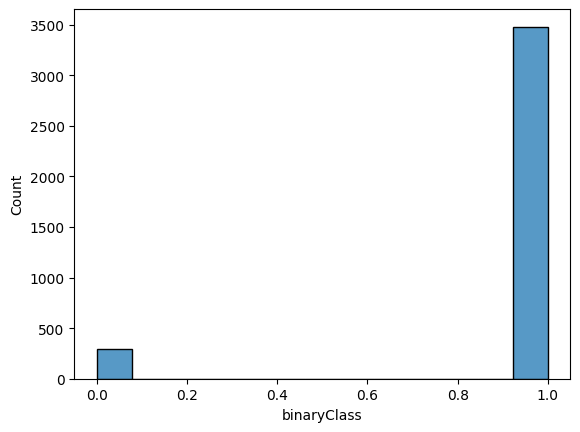

In [87]:
sns.histplot(thyroid_df['binaryClass'])

In [88]:
scaler = StandardScaler()
thyroid_df = pd.DataFrame(scaler.fit_transform(thyroid_df.to_numpy()), columns=thyroid_df.columns)

In [89]:
thyroid_df

age       sex  on thyroxine  query on thyroxine  \
0    -0.533513 -0.658954     -0.374521           -0.115904   
1    -1.429156 -0.658954     -0.374521           -0.115904   
2    -0.284723  1.517556     -0.374521           -0.115904   
3     0.909468 -0.658954      2.670077           -0.115904   
4     0.909468 -0.658954     -0.374521           -0.115904   
...        ...       ...           ...                 ...   
3767 -1.080850 -0.658954     -0.374521           -0.115904   
3768  0.809952 -0.658954     -0.374521           -0.115904   
3769  1.108500 -0.658954     -0.374521           -0.115904   
3770  1.008984  1.517556     -0.374521           -0.115904   
3771  0.610920 -0.658954     -0.374521           -0.115904   

      on antithyroid medication      sick  pregnant  thyroid surgery  \
0                     -0.107384 -0.201375 -0.119378        -0.119378   
1                     -0.107384 -0.201375 -0.119378        -0.119378   
2                     -0.107384 -0.201375 -0.119378        -0.119378   
3                     -0.107384 -0.201375 -0.119378        -0.119378   
4                     -0.107384 -0.201375 -0.119378        -0.119378   
...                         ...       ...       ...              ...   
3767                  -0.107384 -0.201375 -0.119378        -0.119378   
3768                  -0.107384 -0.201375 -0.119378        -0.119378   
3769                  -0.107384 -0.201375 -0.119378        -0.119378   
3770                  -0.107384 -0.201375 -0.119378        -0.119378   
3771                  -0.107384 -0.201375 -0.119378        -0.119378   

      I131 treatment  query hypothyroid  ...  T3 measured        T3  \
0          -0.126056          -0.257175  ...     0.506041  0.817848   
1          -0.126056          -0.257175  ...     0.506041  0.361965   
2          -0.126056          -0.257175  ...    -1.976125 -1.461567   
3          -0.126056          -0.257175  ...     0.506041  0.270789   
4          -0.126056          -0.257175  ...     0.506041 -0.367448   
...              ...                ...  ...          ...       ...   
3767       -0.126056          -0.257175  ...    -1.976125 -1.461567   
3768       -0.126056          -0.257175  ...     0.506041  0.453142   
3769       -0.126056          -0.257175  ...     0.506041  0.179612   
3770       -0.126056          -0.257175  ...     0.506041  0.361965   
3771       -0.126056          -0.257175  ...     0.506041  0.544319   

      TT4 measured       TT4  T4U measured       T4U  FTI measured       FTI  \
0         0.255413  0.539971      0.338124  0.697672      0.337150  0.213911   
1         0.255413  0.007277     -2.957494 -2.521241     -2.966042 -2.163908   
2         0.255413  0.169402      0.338124  0.048242      0.337150  0.453874   
3         0.255413  1.698002     -2.957494 -2.521241     -2.966042 -2.163908   
4         0.255413 -0.942308      0.338124 -0.064702      0.337150 -0.636868   
...            ...       ...           ...       ...           ...       ...   
3767     -3.915227 -2.355105     -2.957494 -2.521241     -2.966042 -2.163908   
3768      0.255413  0.516811      0.338124  0.528256      0.337150  0.322985   
3769      0.255413  0.238883      0.338124  0.500020      0.337150  0.126652   
3770      0.255413 -0.455935      0.338124  0.132951      0.337150 -0.266016   
3771      0.255413 -0.062205      0.338124  0.500020      0.337150 -0.156941   

      referral source  binaryClass  
0            0.216665     0.289131  
1           -0.772753     0.289131  
2           -0.772753     0.289131  
3           -0.772753     0.289131  
4            1.206082     0.289131  
...               ...          ...  
3767        -0.772753     0.289131  
3768         1.206082     0.289131  
3769        -0.772753     0.289131  
3770         1.206082     0.289131  
3771        -0.772753     0.289131  

[3772 rows x 28 columns]

## Cardiovascular disease dataset preprocessing

In [90]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


<AxesSubplot:xlabel='cardio', ylabel='Count'>

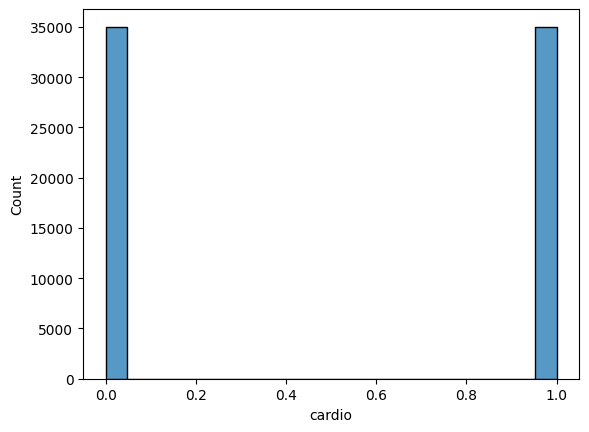

In [93]:
sns.histplot(cardio_df['cardio'])

<AxesSubplot:xlabel='gender', ylabel='Count'>

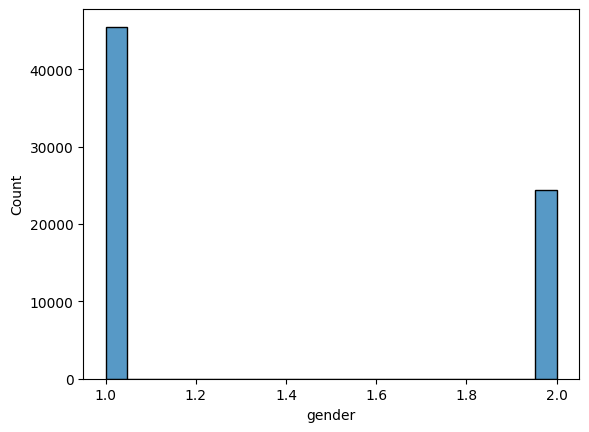

In [95]:
sns.histplot(cardio_df['gender'])

In [96]:
scaler = StandardScaler()
cardio_df = pd.DataFrame(scaler.fit_transform(cardio_df.to_numpy()), columns=cardio_df.columns)

In [97]:
cardio_df

age    gender    height    weight     ap_hi     ap_lo  \
0     -0.436062  1.364055  0.443452 -0.847873 -0.122182 -0.088238   
1      0.307686 -0.733108 -1.018168  0.749831  0.072610 -0.035180   
2     -0.247997 -0.733108  0.078047 -0.708942  0.007679 -0.141297   
3     -0.748152  1.364055  0.565254  0.541435  0.137541  0.017879   
4     -0.808543 -0.733108 -1.018168 -1.264666 -0.187113 -0.194356   
...         ...       ...       ...       ...       ...       ...   
69995 -0.092762  1.364055  0.443452  0.124642 -0.057251 -0.088238   
69996  1.269492 -0.733108 -0.774565  3.597913  0.072610 -0.035180   
69997 -0.163286  1.364055  2.270477  2.139139  0.332333 -0.035180   
69998  1.200589 -0.733108 -0.165556 -0.153219  0.040145 -0.088238   
69999  0.434144 -0.733108  0.687055 -0.153219 -0.057251 -0.088238   

       cholesterol      gluc     smoke      alco    active  cardio  
0        -0.539322 -0.395720 -0.310879 -0.238384  0.494167 -0.9994  
1         2.400793 -0.395720 -0.310879 -0.238384  0.494167  1.0006  
2         2.400793 -0.395720 -0.310879 -0.238384 -2.023607  1.0006  
3        -0.539322 -0.395720 -0.310879 -0.238384  0.494167  1.0006  
4        -0.539322 -0.395720 -0.310879 -0.238384 -2.023607 -0.9994  
...            ...       ...       ...       ...       ...     ...  
69995    -0.539322 -0.395720  3.216684 -0.238384  0.494167 -0.9994  
69996     0.930735  1.351719 -0.310879 -0.238384  0.494167  1.0006  
69997     2.400793 -0.395720 -0.310879  4.194906 -2.023607  1.0006  
69998    -0.539322  1.351719 -0.310879 -0.238384 -2.023607  1.0006  
69999     0.930735 -0.395720 -0.310879 -0.238384  0.494167 -0.9994  

[70000 rows x 12 columns]

# Independence graphs

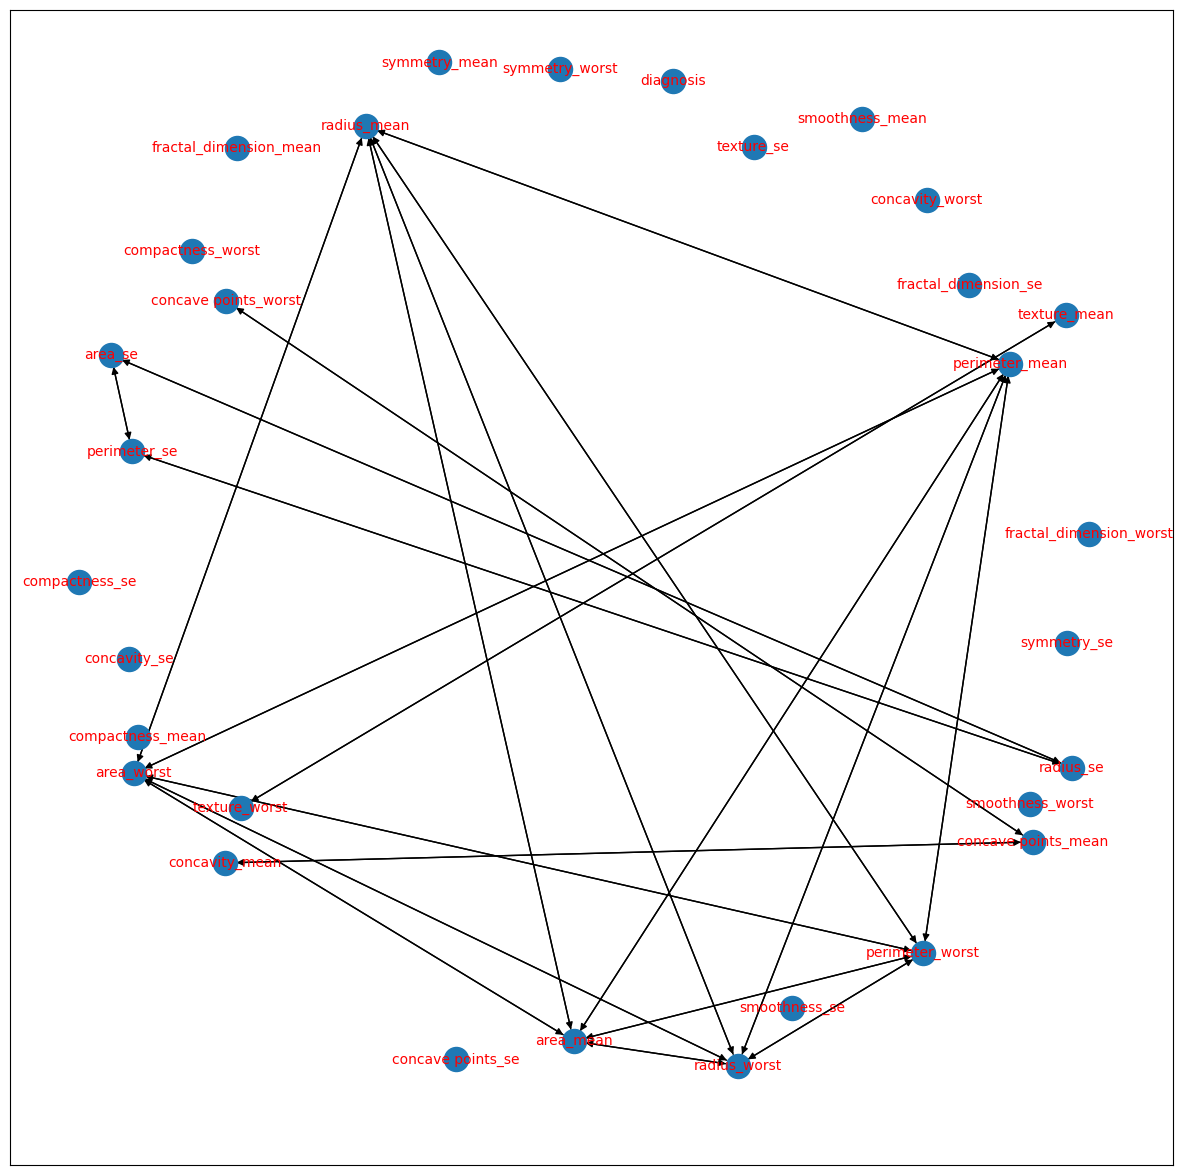

In [103]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton_bc = glasso.predict(breast_cancer_df, 0.9)
skeleton_bc.remove_edges_from(nx.selfloop_edges(skeleton_bc))

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(skeleton_bc, font_size=10, font_color='r')

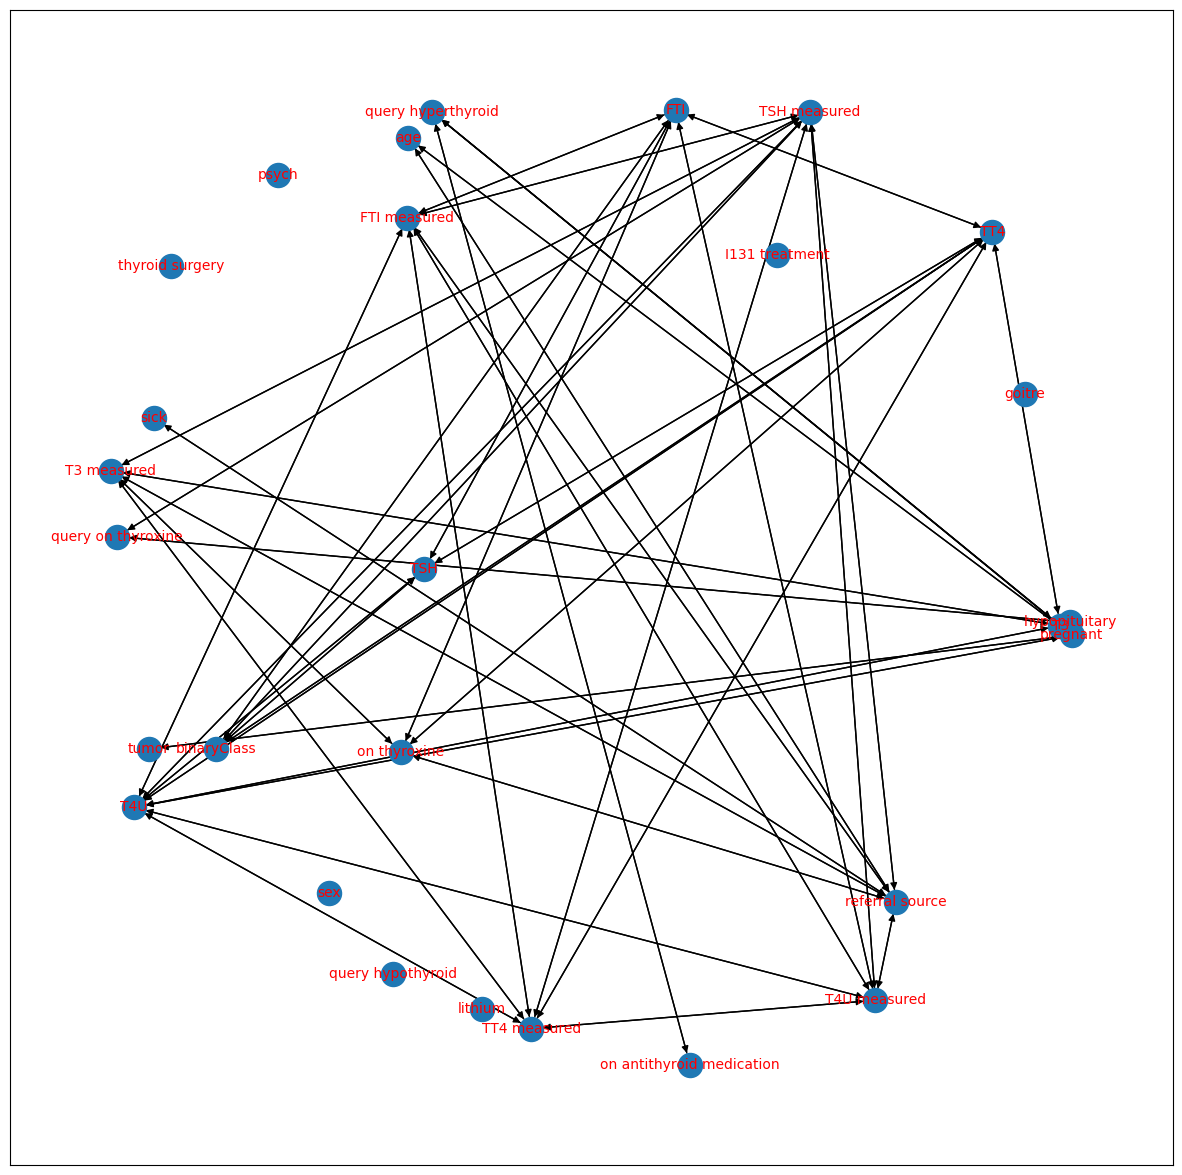

In [104]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton_t = glasso.predict(thyroid_df, 0.1)
skeleton_t.remove_edges_from(nx.selfloop_edges(skeleton_t))

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(skeleton_t, font_size=10, font_color='r')

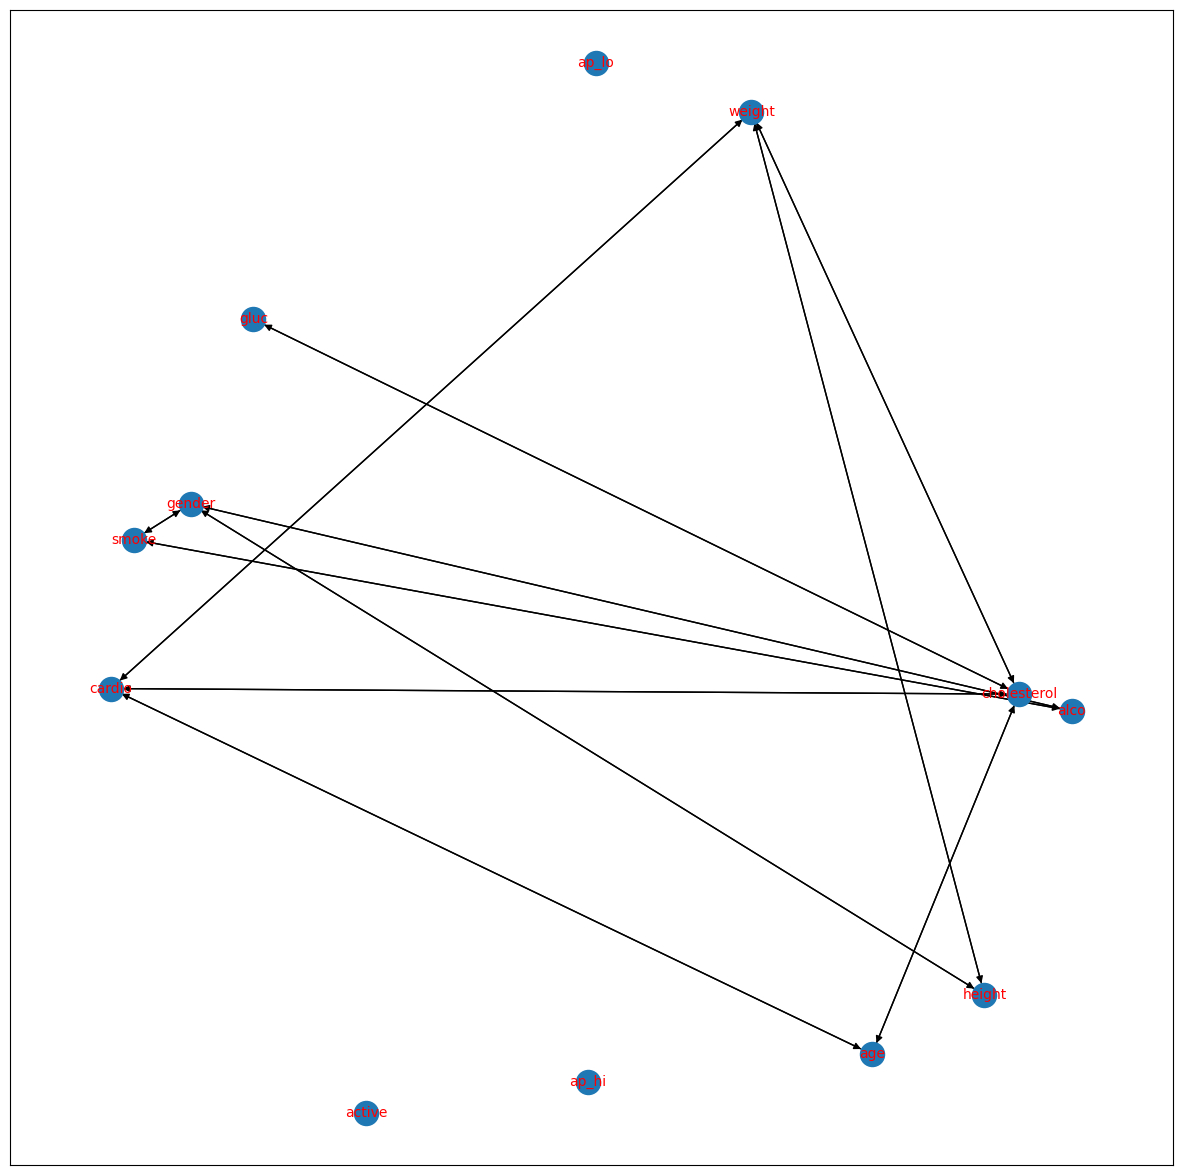

In [105]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton_c = glasso.predict(cardio_df, 0.1)
skeleton_c.remove_edges_from(nx.selfloop_edges(skeleton_c))

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(skeleton_c, font_size=10, font_color='r')

# PC

## Constrained

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


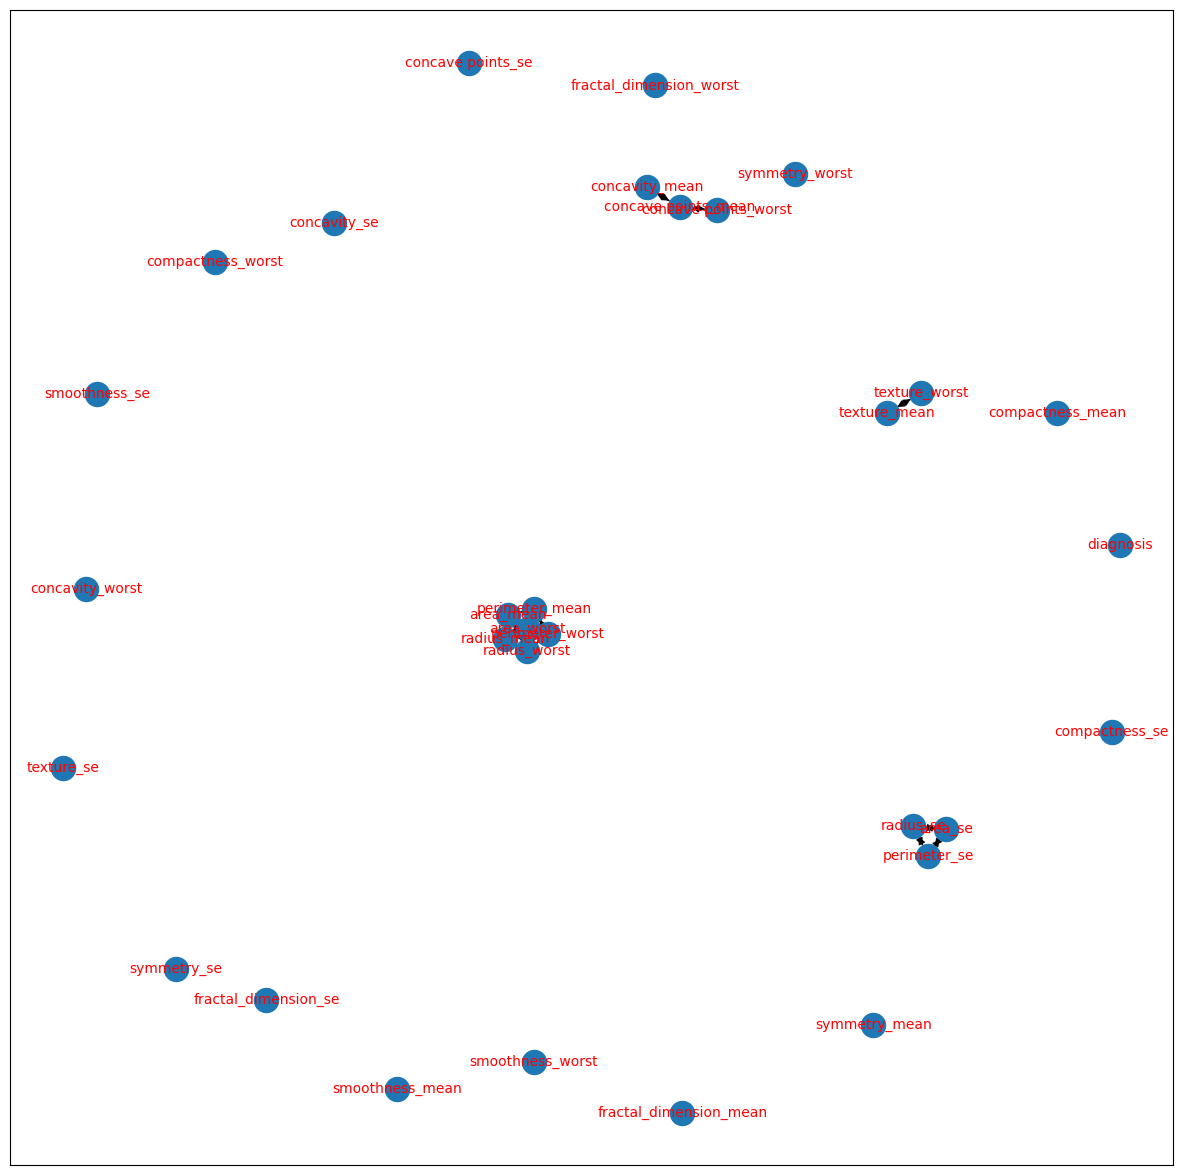

In [106]:
model_pc = cdt.causality.graph.PC()
graph_pc_c = model_pc.predict(breast_cancer_df, skeleton_bc)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_c, font_size=10, font_color='r')

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


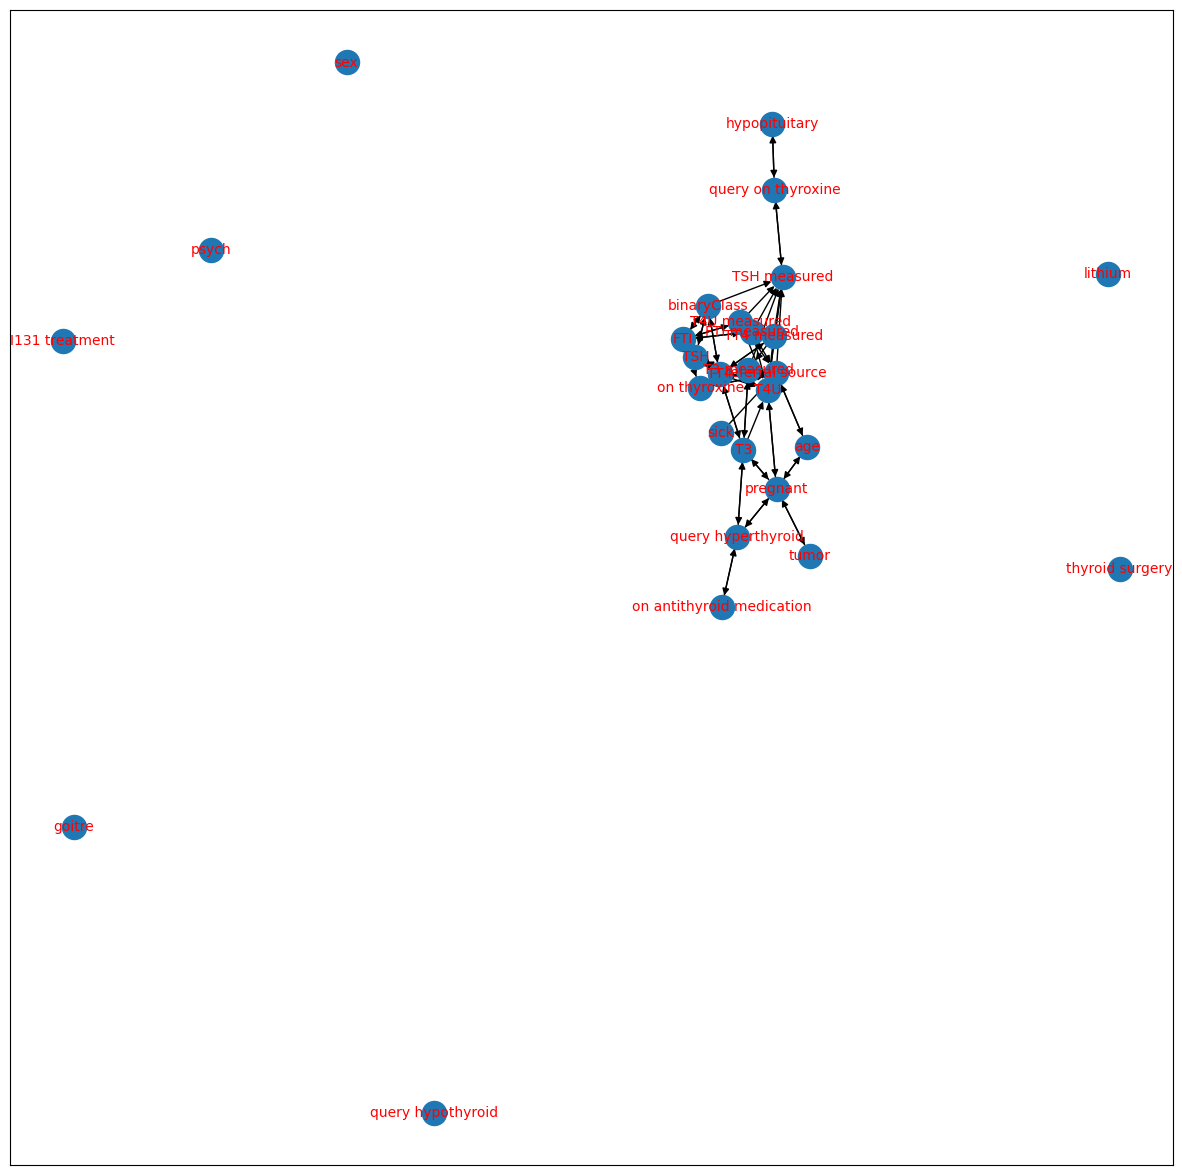

In [107]:
model_pc = cdt.causality.graph.PC()
graph_pc_c = model_pc.predict(thyroid_df, skeleton_t)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_c, font_size=10, font_color='r')

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


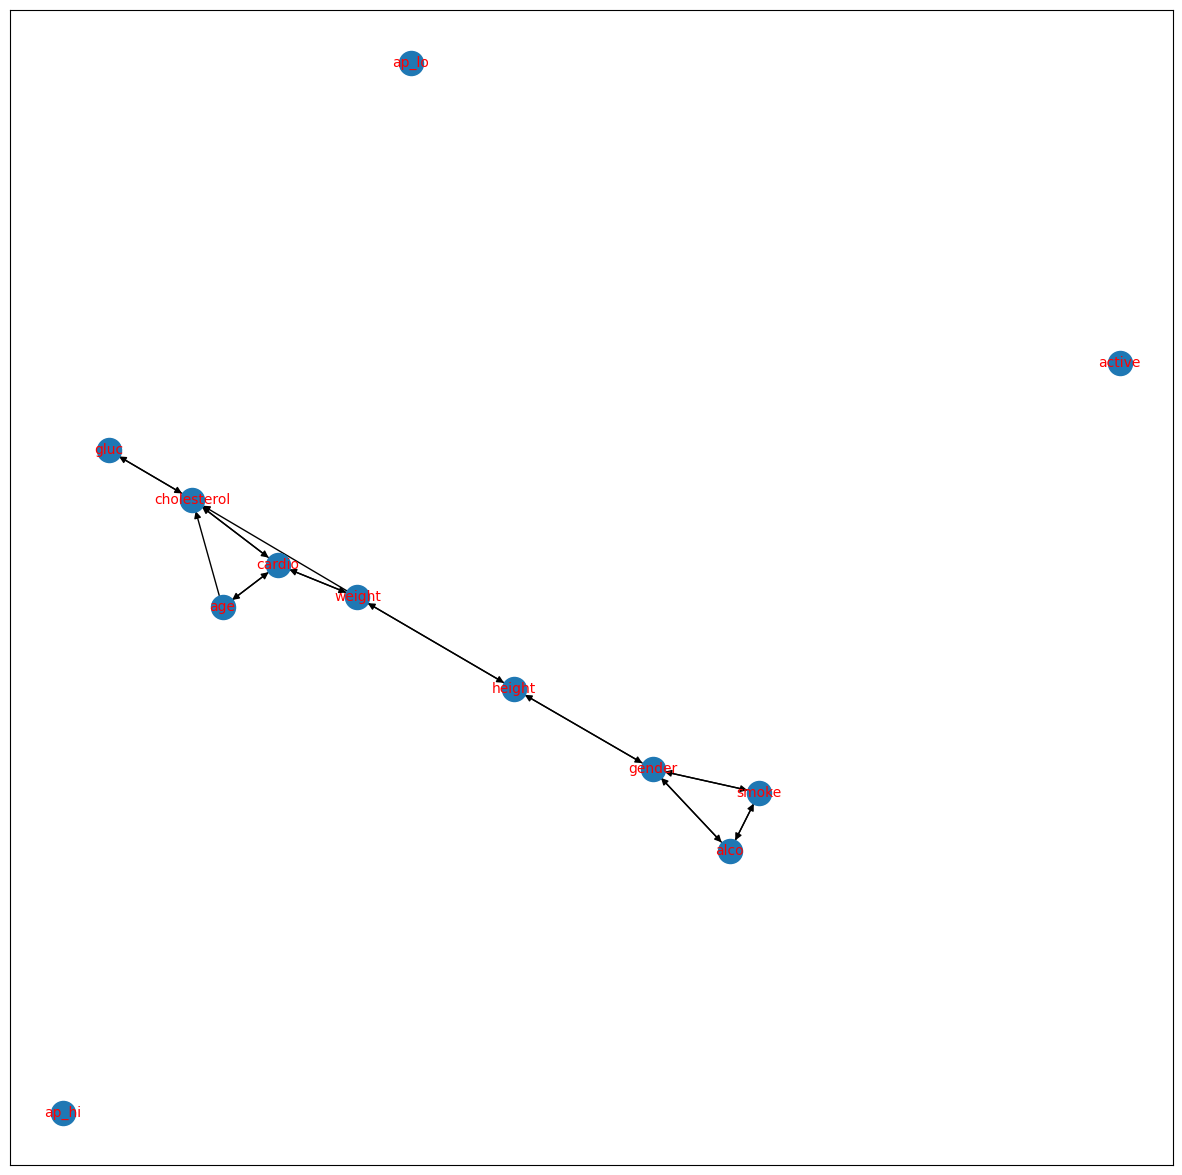

In [108]:
model_pc = cdt.causality.graph.PC()
graph_pc_c = model_pc.predict(cardio_df, skeleton_c)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_c, font_size=10, font_color='r')

## Unconstrained

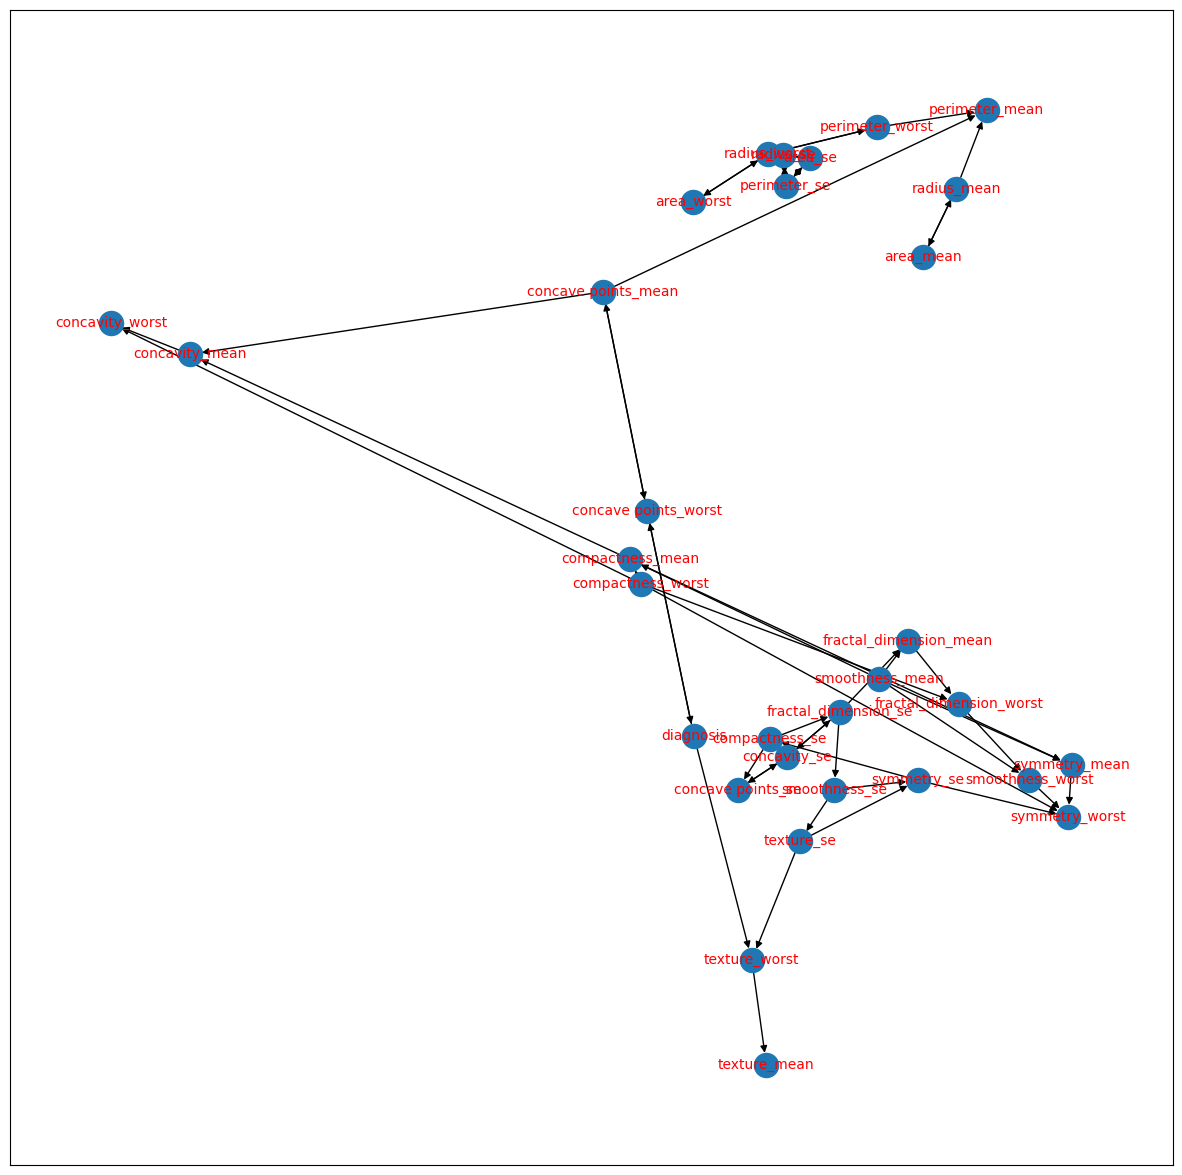

In [109]:
model_pc = cdt.causality.graph.PC()
graph_pc_u = model_pc.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_u, font_size=10, font_color='r')

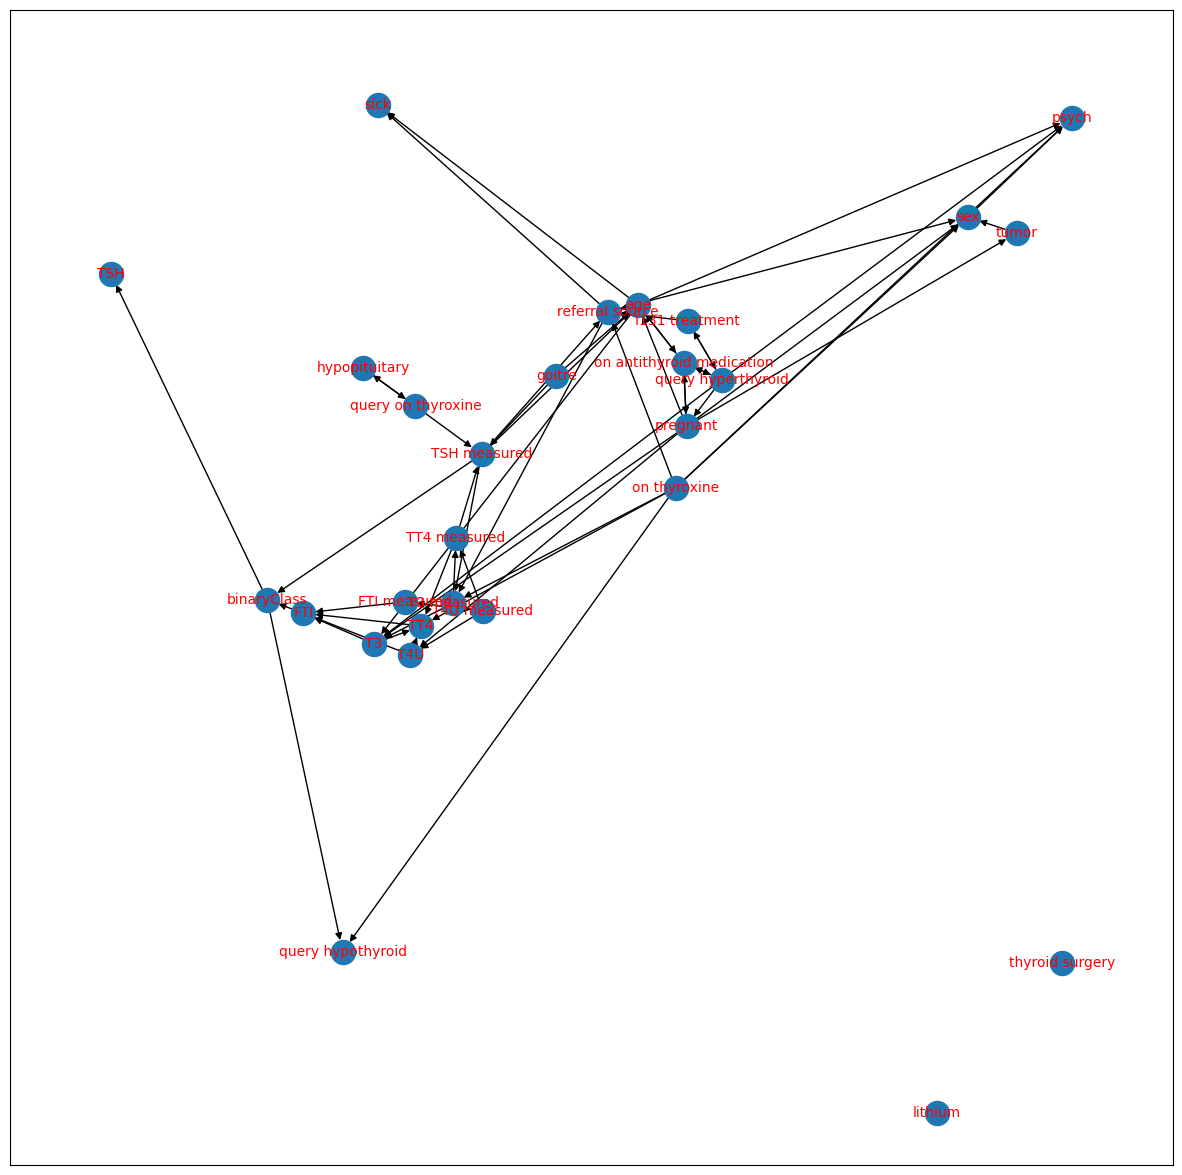

In [110]:
model_pc = cdt.causality.graph.PC()
graph_pc_u = model_pc.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_u, font_size=10, font_color='r')

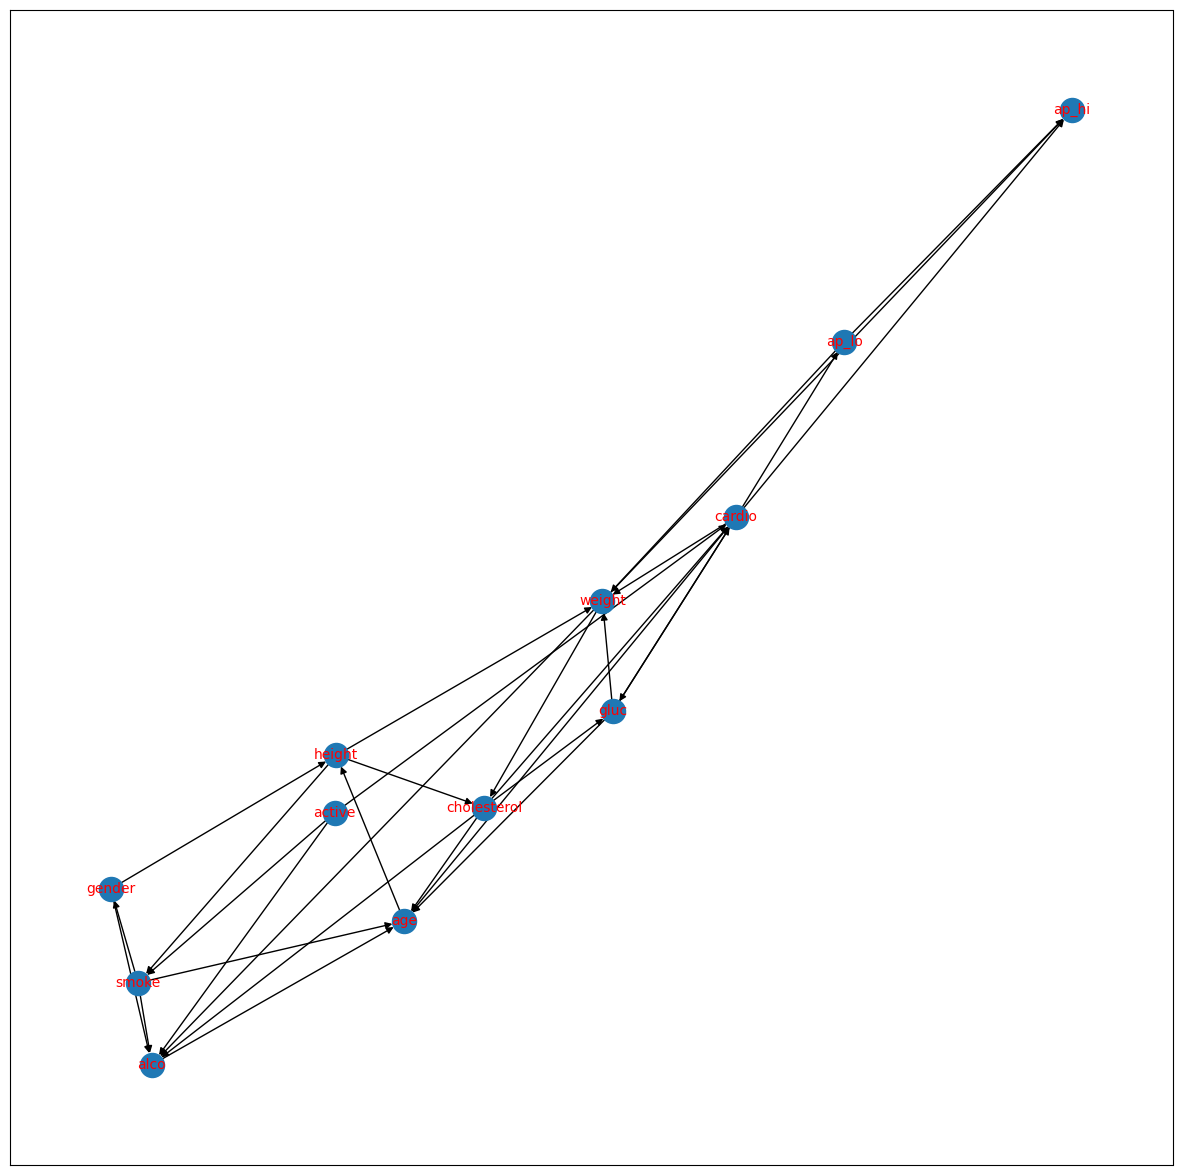

In [111]:
model_pc = cdt.causality.graph.PC()
graph_pc_u = model_pc.predict(cardio_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_u, font_size=10, font_color='r')

# GES

## Constrained

GES is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


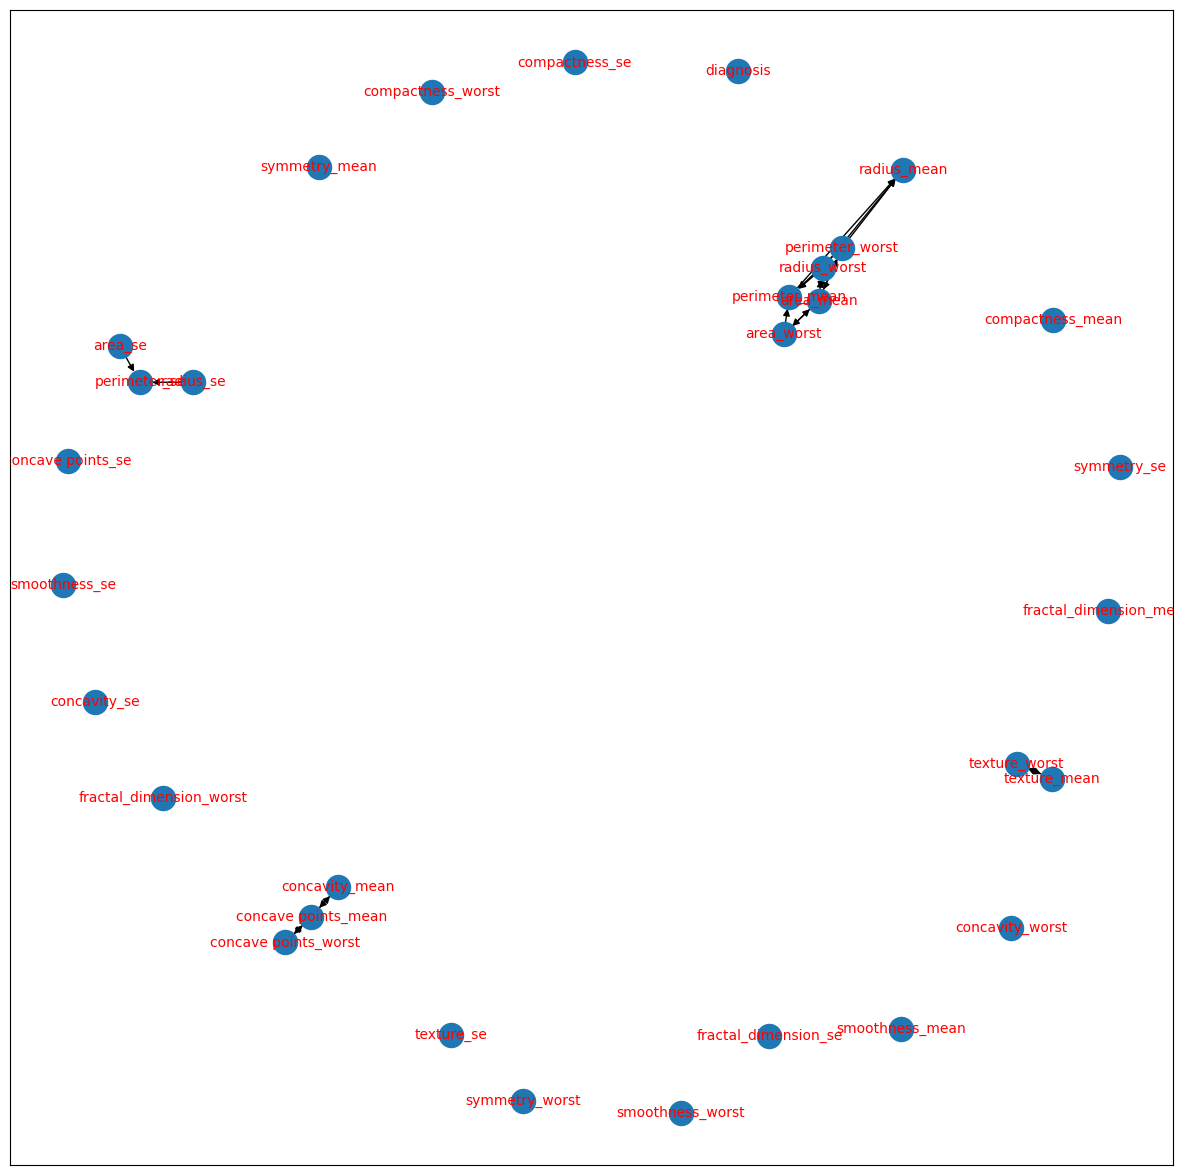

In [112]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_c = model_ges.predict(breast_cancer_df, skeleton_bc)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_c, font_size=10, font_color='r')

GES is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


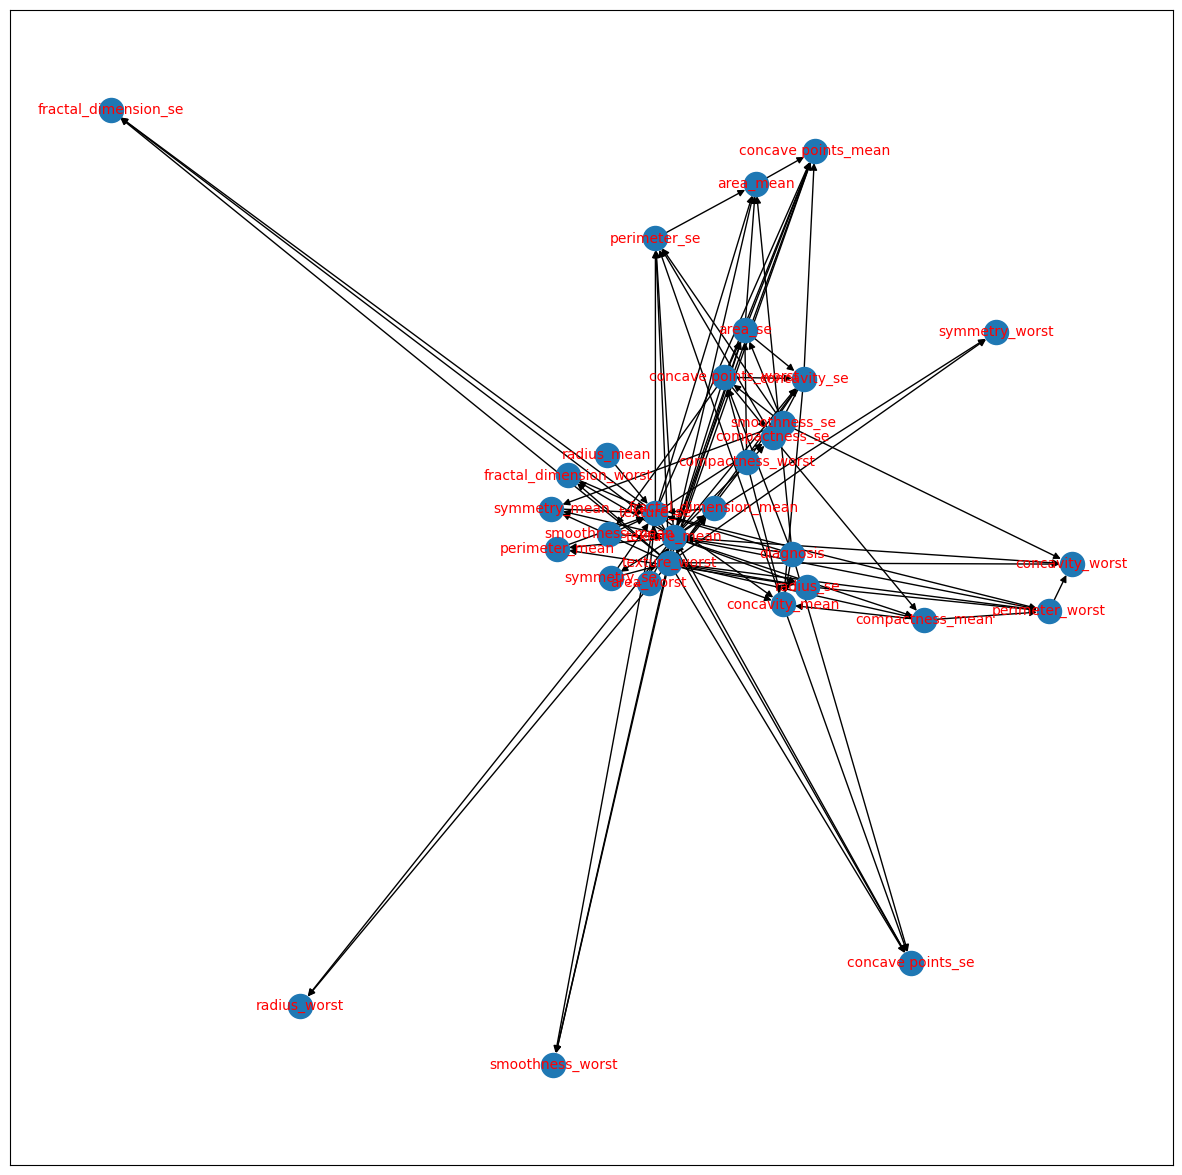

In [113]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_c = model_ges.predict(breast_cancer_df, skeleton_t)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_c, font_size=10, font_color='r')

GES is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


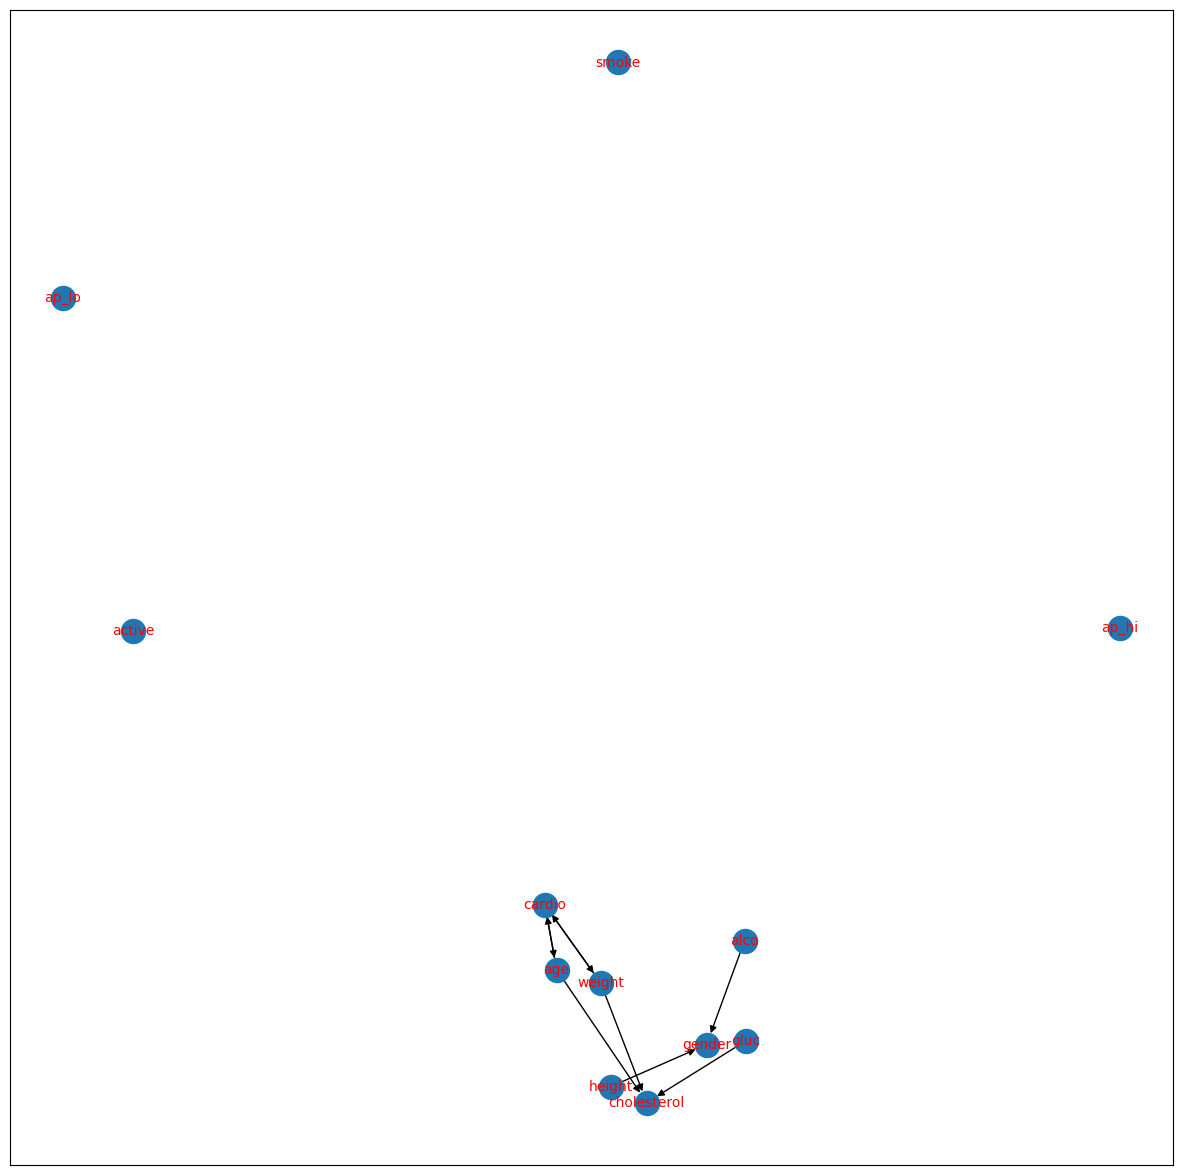

In [114]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_c = model_ges.predict(cardio_df, skeleton_c)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_c, font_size=10, font_color='r')

## Unconstrained

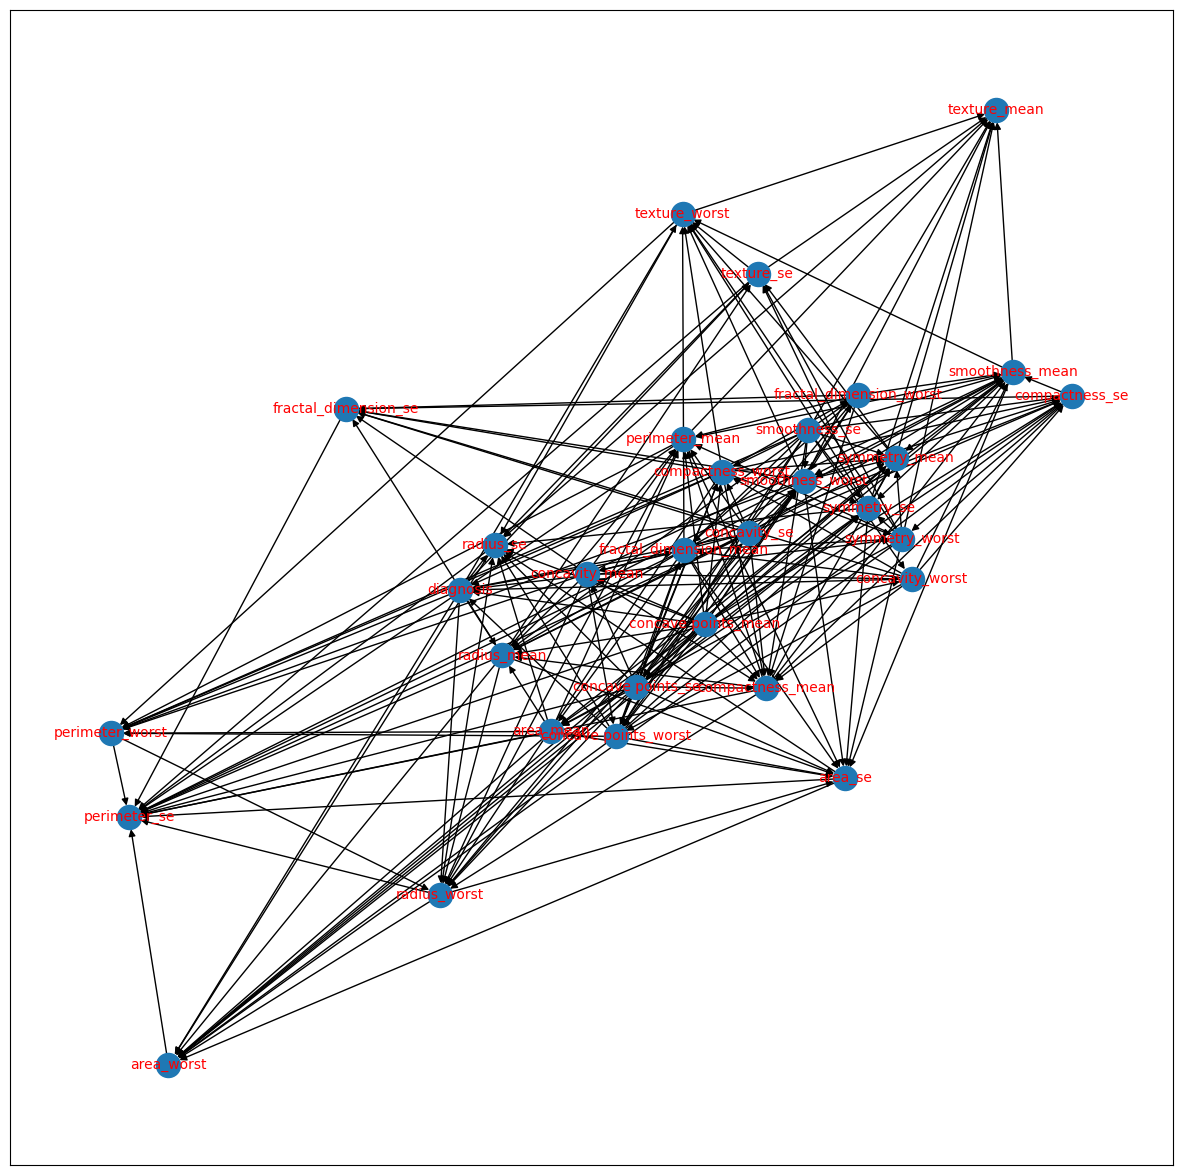

In [115]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_u = model_ges.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_u, font_size=10, font_color='r')

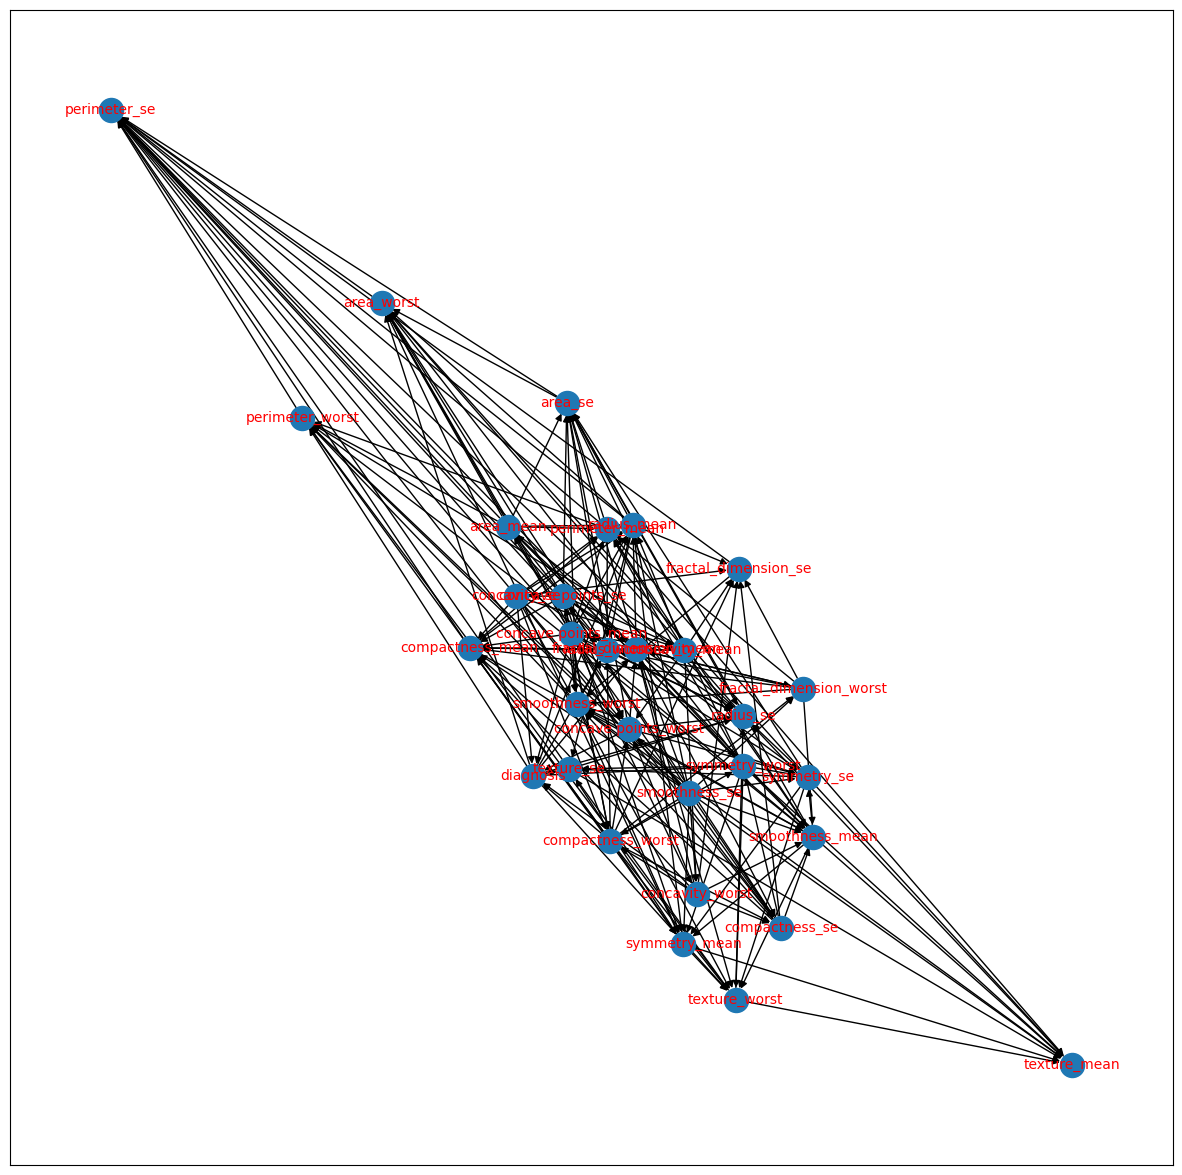

In [116]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_u = model_ges.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_u, font_size=10, font_color='r')

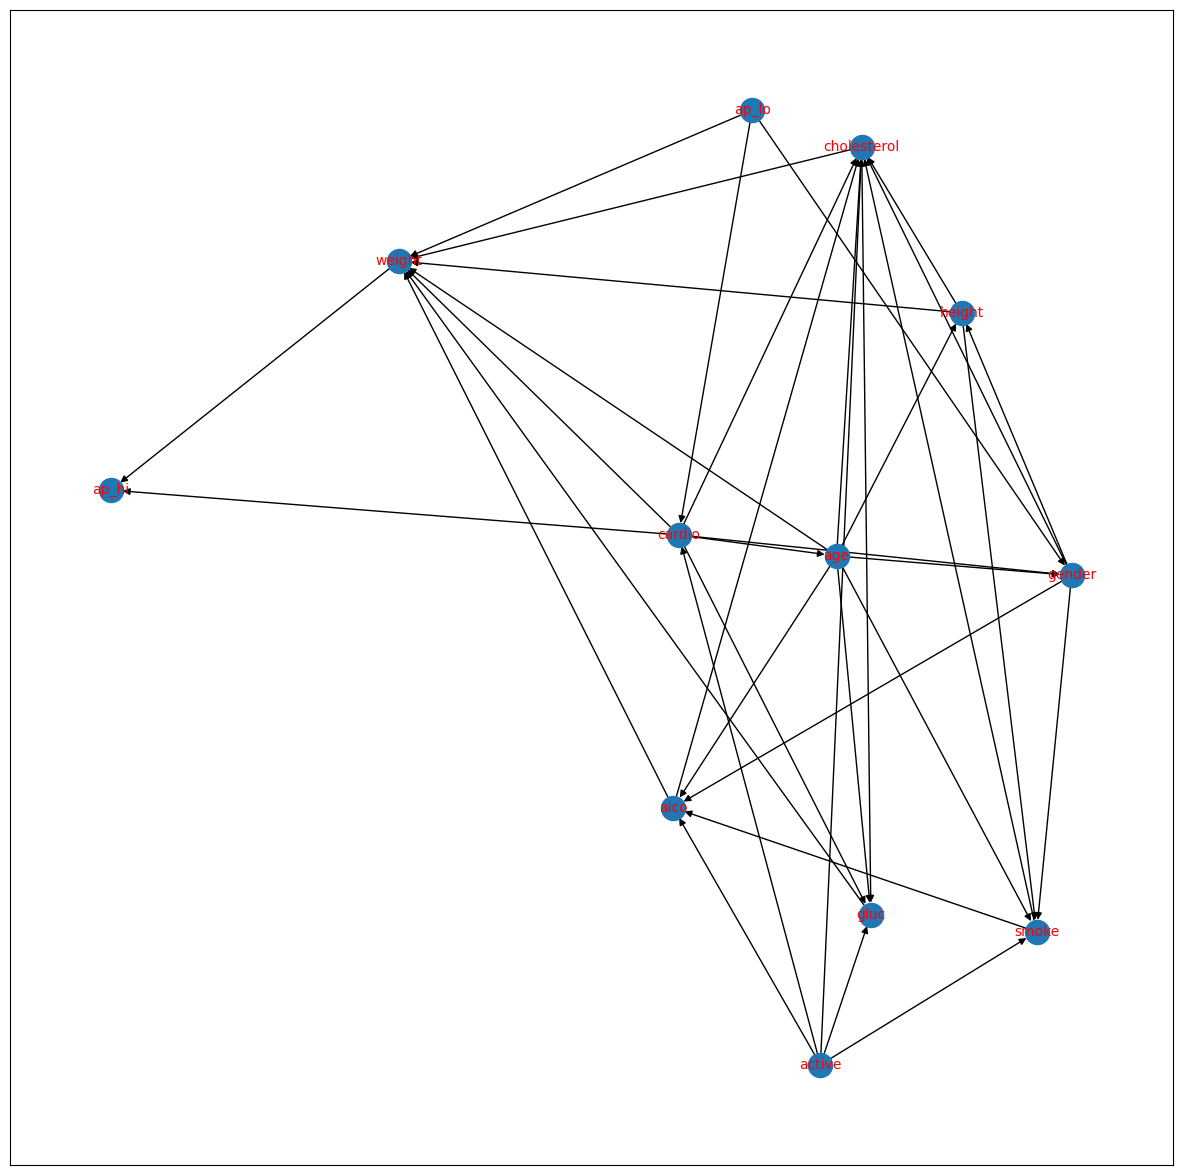

In [117]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_u = model_ges.predict(cardio_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_u, font_size=10, font_color='r')

# LiNGAM

## Unconstrained (LiNGAM cannot be perfomed constrained)

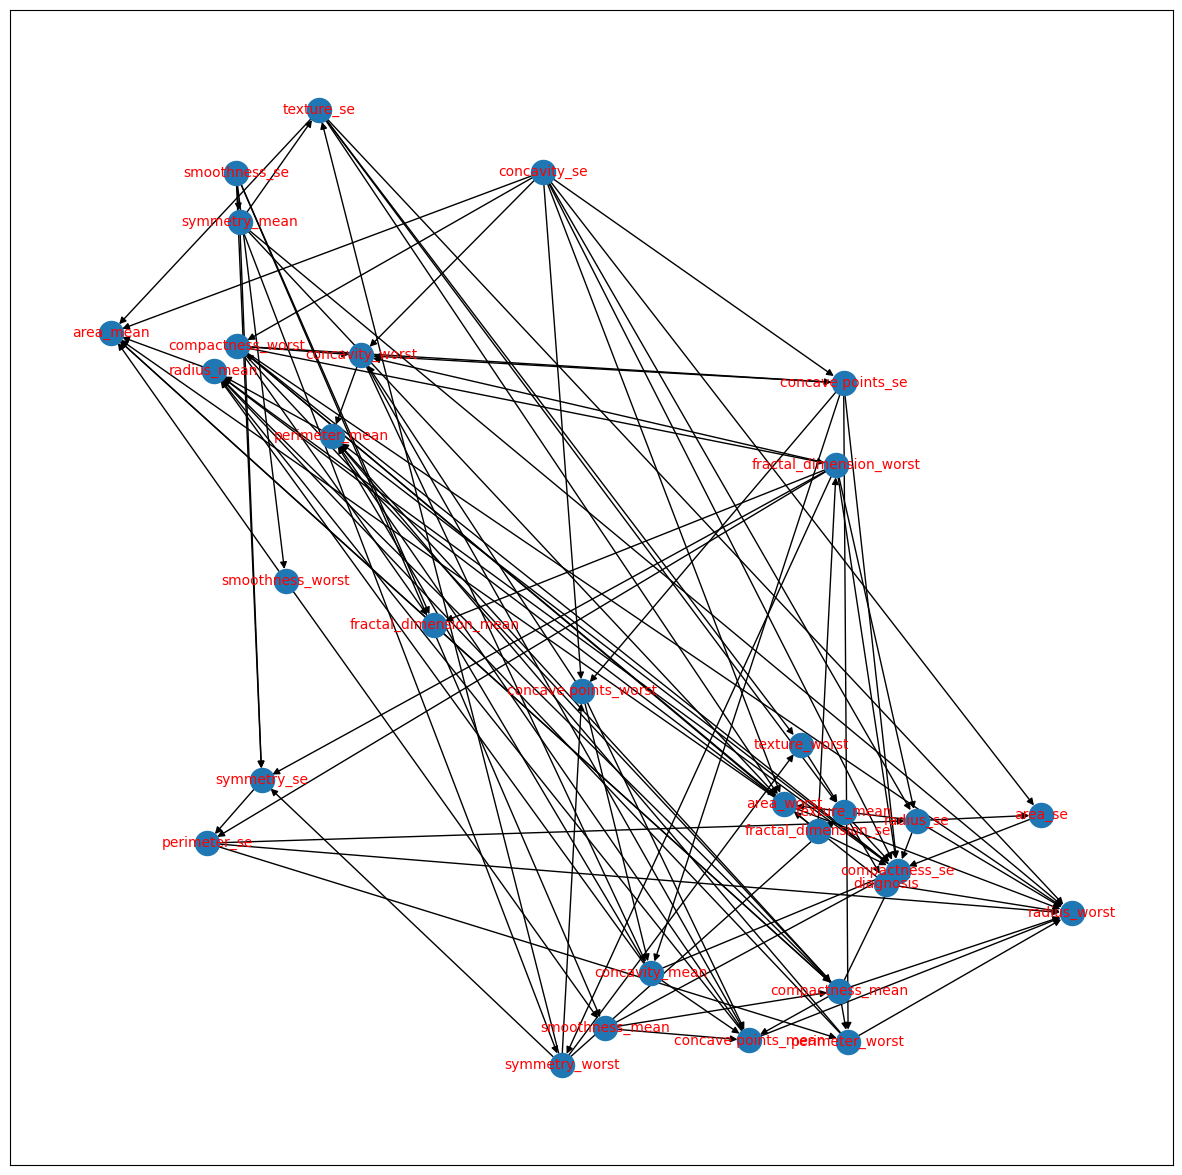

In [118]:
# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_lingam, font_size=10, font_color='r')

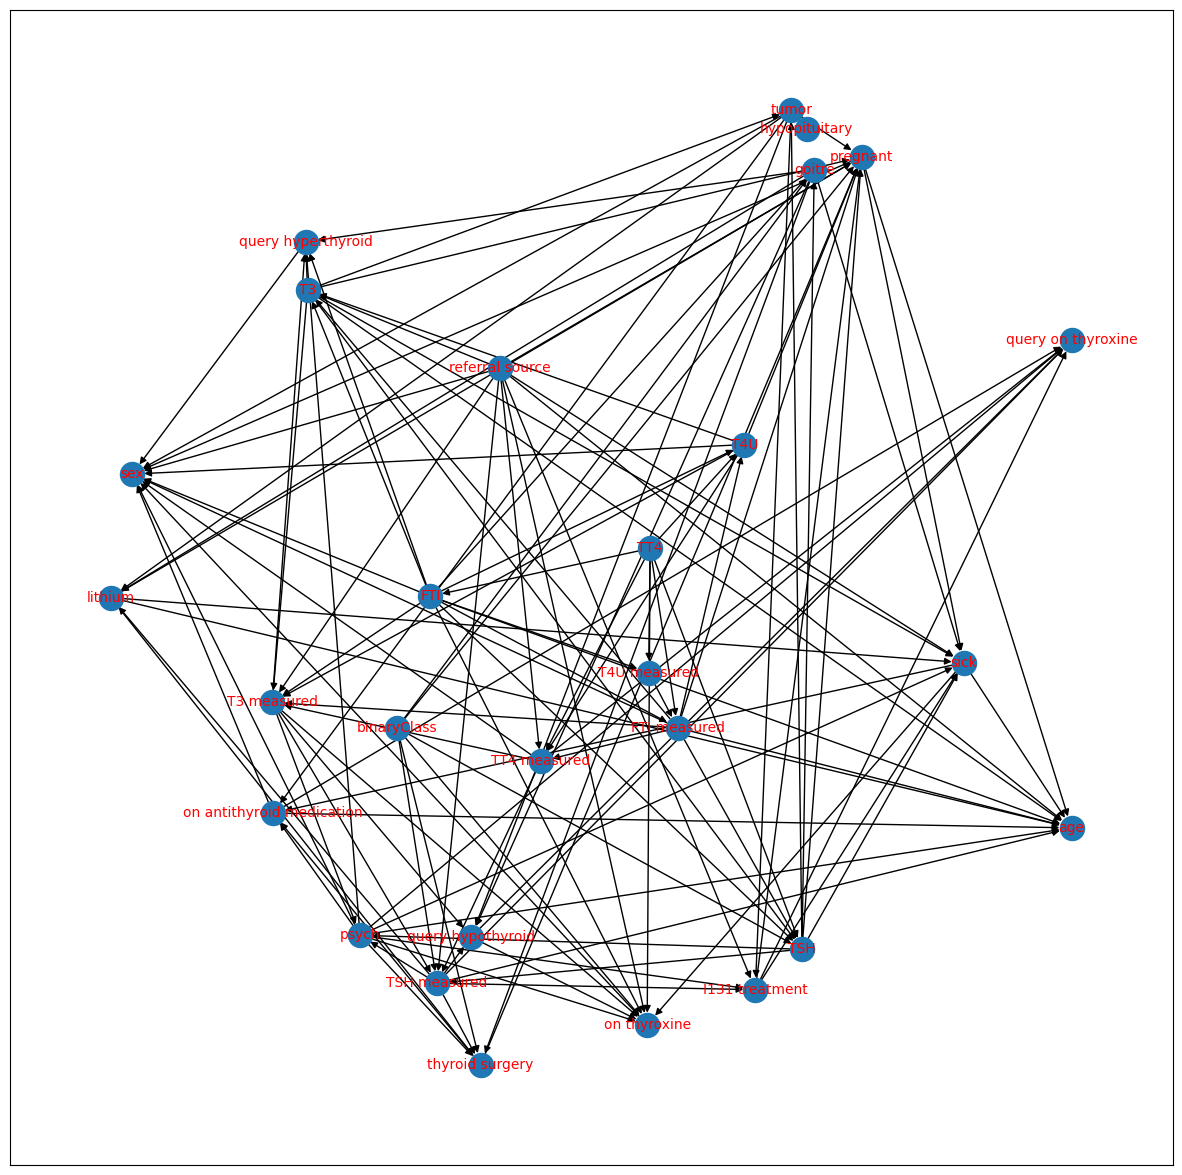

In [119]:
# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_lingam, font_size=10, font_color='r')

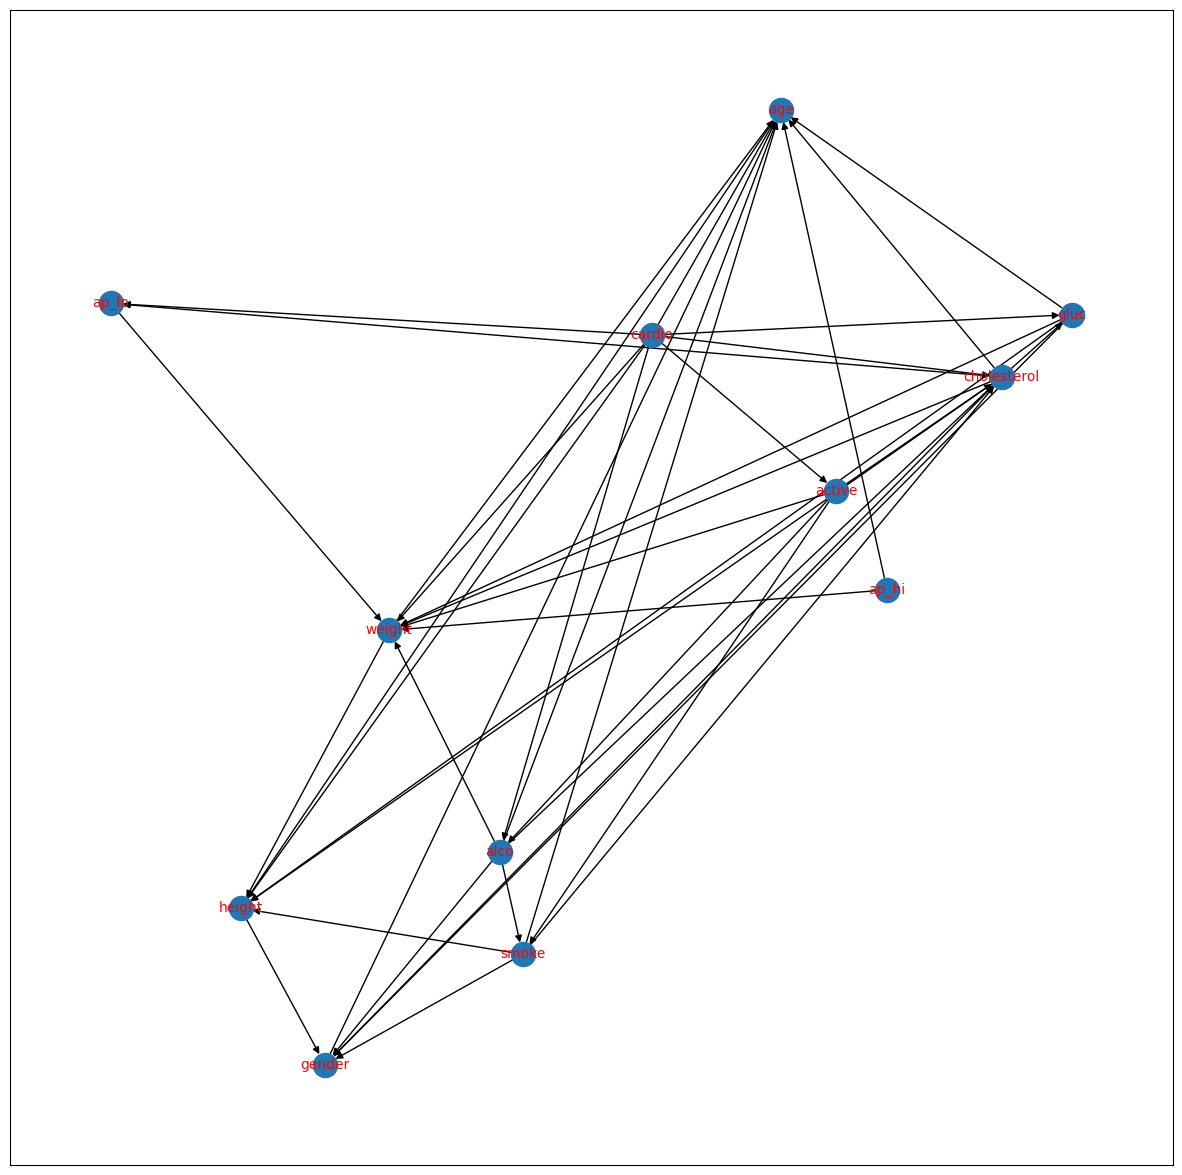

In [120]:
# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(cardio_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_lingam, font_size=10, font_color='r')

# SAM (only unconstrained because of a bug of cdt)

In [ ]:
# SAM Algorithm
model_sam = cdt.causality.graph.SAM(nruns=1)
graph_sam = model_sam.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_sam, font_size=10, font_color='r')

In [ ]:
# SAM Algorithm
model_sam = cdt.causality.graph.SAM(nruns=1)
graph_sam = model_sam.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_sam, font_size=10, font_color='r')

In [ ]:
# SAM Algorithm
model_sam = cdt.causality.graph.SAM(nruns=1)
graph_sam = model_sam.predict(cardio_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_sam, font_size=10, font_color='r')

# CGNN

In [ ]:
# CGNN Algorithm
model_cgnn = cdt.causality.graph.CGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1, gpus=1, verbose=True)
graph_cgnn = model_cgnn.predict(breast_cancer_df, skeleton_bc)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_cgnn, font_size=10, font_color='r')

In [ ]:
# CGNN Algorithm
model_cgnn = cdt.causality.graph.CGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1, gpus=1, verbose=True)
graph_cgnn = model_cgnn.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_cgnn, font_size=10, font_color='r')

In [ ]:
# CGNN Algorithm
model_cgnn = cdt.causality.graph.CGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1, gpus=1, verbose=True)
graph_cgnn = model_cgnn.predict(cardio_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_cgnn, font_size=10, font_color='r')

# Synthetic data

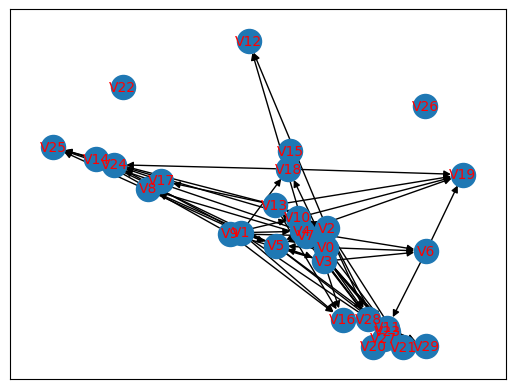

In [121]:
generator = AcyclicGraphGenerator('linear', npoints=10000, nodes=30)
data, graph = generator.generate()
generator.to_csv('generated_graph')

nx.draw_networkx(graph, font_size=10, font_color='r')

## Skeleton

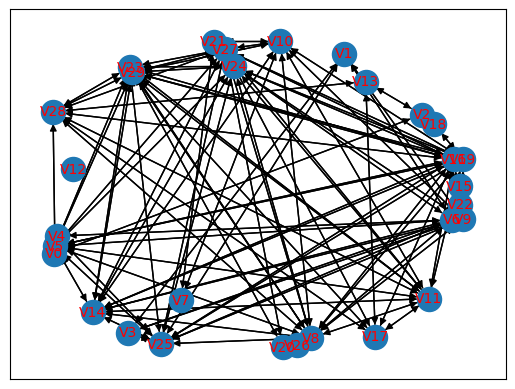

In [126]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton = glasso.predict(data, 0.9)
skeleton.remove_edges_from(nx.selfloop_edges(skeleton))

# visualize network
fig=plt.figure()
nx.draw_networkx(skeleton, font_size=10, font_color='r')

## PC

### Constrained

In [ ]:
model_pc = cdt.causality.graph.PC()
predict = model_pc.predict(data, skeleton)

nx.draw_networkx(predict, font_size=10, font_color='r')

PC (constrained):
Structural hamming distance: 65
Area under the curve: 0.324


adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


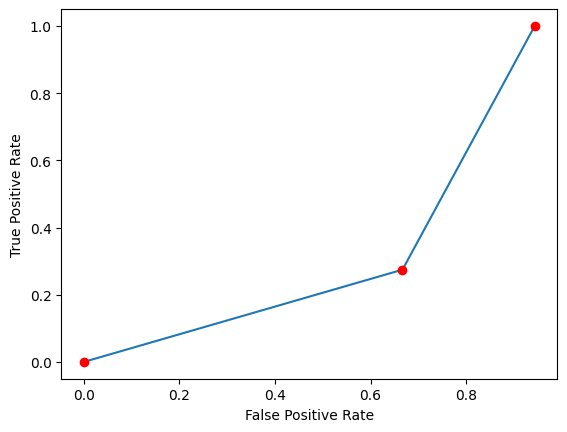

In [ ]:
shd = cdt.metrics.SHD(graph, predict)
auc, roc = cdt.metrics.precision_recall(graph, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("PC (constrained):")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Unconstrained

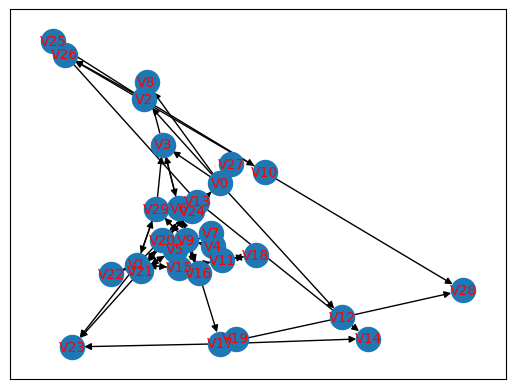

In [ ]:
model_pc = cdt.causality.graph.PC()
predict = model_pc.predict(data)

nx.draw_networkx(predict, font_size=10, font_color='r')

PC (unconstrained):
Structural hamming distance: 62
Area under the curve: 0.496


adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


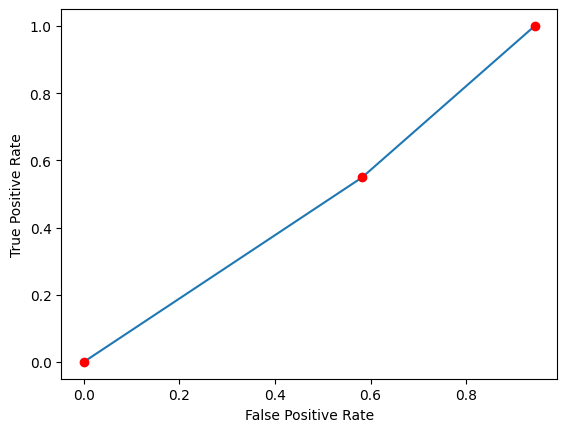

In [ ]:
shd = cdt.metrics.SHD(graph, predict)
auc, roc = cdt.metrics.precision_recall(graph, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("PC (unconstrained):")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## GES

### Constrained

GES is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


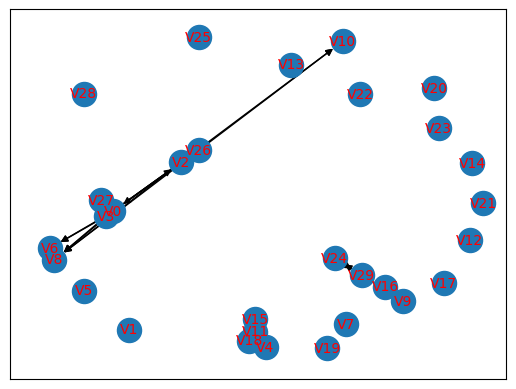

In [ ]:
model_ges = cdt.causality.graph.GES()
predict = model_ges.predict(data, skeleton)

nx.draw_networkx(predict, font_size=10, font_color='r')

GES (constrained):
Structural hamming distance: 58
Area under the curve: 0.306


adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


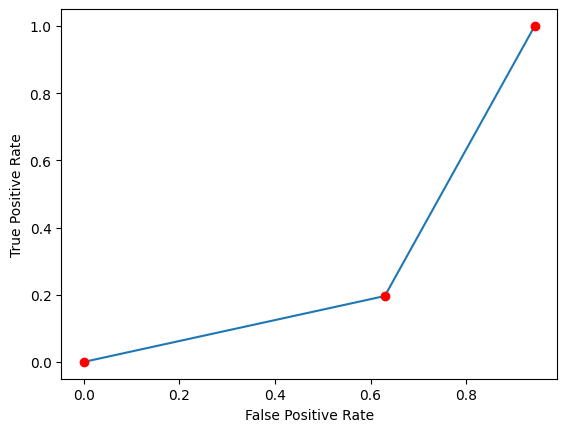

In [ ]:
shd = cdt.metrics.SHD(graph, predict)
auc, roc = cdt.metrics.precision_recall(graph, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("GES (constrained):")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Unconstrained

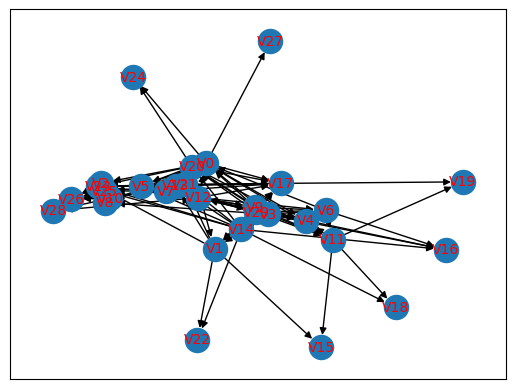

In [ ]:
model_ges = cdt.causality.graph.GES()
predict = model_ges.predict(data)

nx.draw_networkx(predict, font_size=10, font_color='r')

GES (unconstrained):
Structural hamming distance: 85
Area under the curve: 0.531


adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


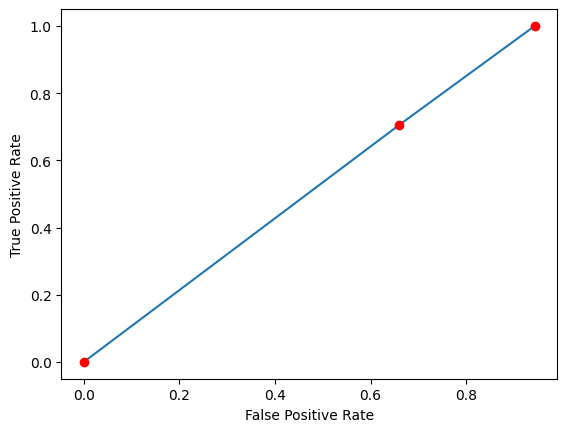

In [ ]:
shd = cdt.metrics.SHD(graph, predict)
auc, roc = cdt.metrics.precision_recall(graph, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("GES (unconstrained):")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## LiNGAM

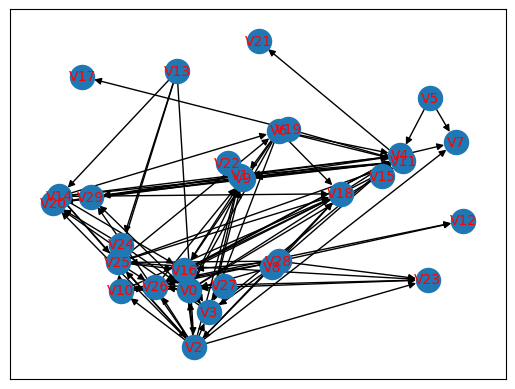

In [ ]:
model_lingam = cdt.causality.graph.LiNGAM()
predict = model_lingam.predict(data)

nx.draw_networkx(predict, font_size=10, font_color='r')

LiNGAM:
Structural hamming distance: 101
Area under the curve: 0.394


adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


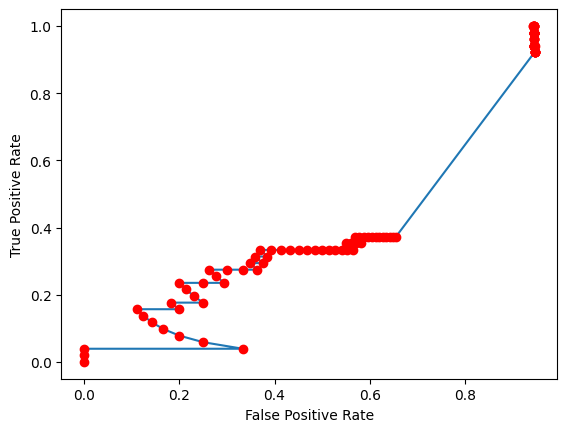

In [ ]:
shd = cdt.metrics.SHD(graph, predict)
auc, roc = cdt.metrics.precision_recall(graph, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("LiNGAM:")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()